# 2.2.1 列表递推和可读性

## ord() 和 chr()
> ord()是一个内置函数，用于返回给定字符的Unicode代码点（整数表示）<br>
> 与ord()函数对应的是chr()函数，它接受一个整数参数（Unicode代码点）并返回对应的字符

In [2]:
""" 把一个字符变成 Unicode """
special_code = '&'

unicode_ts = ord(special_code)

unicode_ts  # Unicode 对应的代码点

38

转换 Unicode 代码点为对应的字符

In [6]:
chr(48)

'0'

## 2-1 普通 for 生成列表

In [7]:
symbols = '$¢£¥€¤'
codes = []

for symbol in symbols:
    codes.append(ord(symbol))

codes

[36, 162, 163, 165, 8364, 164]

## 2-2 列表推导

In [8]:
symbols = '$¢£¥€¤'
codes = [ord(symbol) for symbol in symbols]

codes

[36, 162, 163, 165, 8364, 164]

> 通常的原则是，只用列表推导来创建新的列表，并且尽量保持简短<br>
> 如序列构成的数组果列表推导的代码超过了两行，你可能就要考虑是不是得用 for 循环重写了
---

<br>

# 2.2.2 列表推导同 filter和map 的比较

## 2-3 列表递推

In [9]:
symbols = '$¢£¥€¤'
beyond_ascii: list = [ord(s) for s in symbols if ord(s) > 127]

beyond_ascii

[162, 163, 165, 8364, 164]

## 2-4 使用 filter map 实现上面同理操作 

In [10]:
beyond_ascii = list(filter(lambda c: c > 127, map(ord, symbols)))

beyond_ascii

[162, 163, 165, 8364, 164]

> 阅读下面认识部分，就可以读懂这个代码了<br>
> 这里我假设你已经阅读了下面认识函数的部分，那么我们就来解读这里做了什么吧<br>
> ord() 就是让 symbols 里面所有的字符串都变成 Unicode 代码点新组成一个新的可迭代器<br>
> 然后 filter() 函数会根据 lambda 规则，选出所有 > 127 的 Unicode 成为一个新的可迭代器<br>
> 最后我们使用 list() 把可迭代器转换成一个列表，里面存储所有Unicode代码点 > 127 的字符

In [23]:
ls = [chr(x) for x in beyond_ascii]

''.join(ls)  # 被筛选后的字符组合

'¢£¥€¤'

###  2-4-1 认识 lambda

In [ ]:
# 函数原型
lambda arguments: expression

In [11]:
# 定义一个简单的 lambda 表达式
addition = lambda x, y: x + y

# 使用 lambda 表达式调用函数
result = addition(3, 4)
print(result)  # 输出: 7

7


> 1. 这么看来 lambda 就是一个接受参数和组合参数的表达式 <br>
> 2. lambda 参数 : 表达式 <br>
> 3. 返回值就是表达式的结果

### 2-4-2 认识 map()

In [ ]:
# 函数原型
map(function, iterable)

In [14]:
# 定义一个函数
def square(x):
    return x ** 2

# 应用 map() 函数，迭代对象的元素按照这个映射方法产生一个新的迭代对象
numbers = [1, 2, 3, 4, 5]
squared_numbers = map(square, numbers)  # 返回 map 对象

# 查看 map() 对象
print(squared_numbers)

# 打印结果
print(list(squared_numbers))  # 输出: [1, 4, 9, 16, 25]

[1, 4, 9, 16, 25]


> map() 是一个内置函数，用于对可迭代对象中的每个元素应用一个指定的函数，并返回结果构成的新迭代器<br>
> 新迭代器就是 map 对象，这个对象是可迭代的

### 2-4-3 认识 filter()

In [ ]:
# 函数原型
filter(function, iterable)

In [17]:
# 定义一个函数
def is_even(x):
    return x % 2 == 0

# 应用 filter() 函数
numbers = [1, 2, 3, 4, 5, 6]
even_numbers = filter(is_even, numbers)     # 返回 filter 对象

# 打印 filter 对象
print(even_numbers)

# 打印结果
print(list(even_numbers))  # 输出: [2, 4, 6]

[2, 4, 6]


> filter() 是一个内置函数，用于根据指定的条件过滤可迭代对象中的元素，并返回符合条件的元素构成的新迭代器<br>
> filter 是可以用于迭代的

### 2-4-4 labda 和 map() filter() 的结合
> 我们可以看到 lambda 就是一个匿名函数，指定简单的规则，而 map() filter() 两个函数都是对迭代对象制定规则，然后按照这个规则进行过滤或者新映射，那么我们不一定要写一个完整的函数，我们可以使用 lambda 写简单的函数<br>

== 现在就让我们使用你们函数把上面几个案例重写一下 ==

In [18]:
numbers = [1, 2, 3, 4, 5]
squared_numbers = map(lambda x : x**2, numbers)

print(list(squared_numbers))  # 输出: [1, 4, 9, 16, 25]

[1, 4, 9, 16, 25]


In [19]:
numbers = [1, 2, 3, 4, 5, 6]
even_numbers = filter(lambda x : x % 2 == 0, numbers)

print(list(even_numbers))  # 输出: [2, 4, 6]

[2, 4, 6]


> 是不是发现，有些规则很简单的函数就是 lambda 来的好，可读性会高很多，但是如果规则比较复杂，那还是请用函数实现
---
<br>

# 2.2.3 列表递推实现笛卡尔积

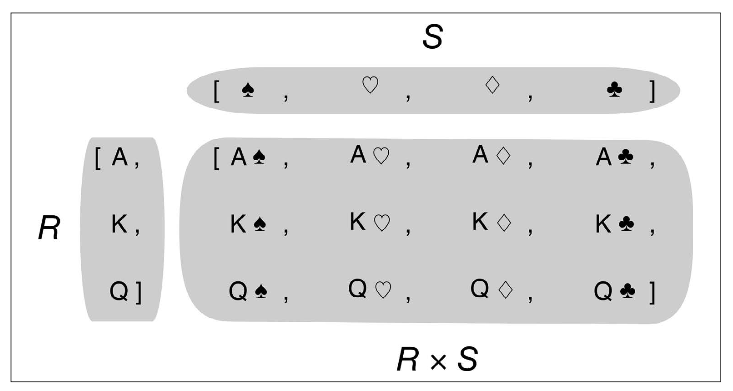

In [24]:
from PIL import Image as img

img.open('img/笛卡尔积.png')

> 笛卡尔积的长度其实就是矩阵的乘法：<br>
> $R_{3\times1} · S_{1\times4} = (R\times S)_{3\times4}$ <br>
> 所以这个数组的长度就是 12 

> 如果你需要一个列表，列表里是 3 种不同尺寸的 T 恤衫，每个尺寸都有 2 个颜色，如何使用笛卡尔积实现呢

In [25]:
from collections import namedtuple

colors = ['white', 'black']
sizes = ['B', 'M', 'S']

cloth = namedtuple('cloth', ['color', 'size'])

clothes = [cloth(color, size) 
           for color in colors
           for size in sizes]

clothes

[cloth(color='white', size='B'),
 cloth(color='white', size='M'),
 cloth(color='white', size='S'),
 cloth(color='black', size='B'),
 cloth(color='black', size='M'),
 cloth(color='black', size='S')]

# 2.2.4 生成器表达式
> 生成器表达式的好处在于它以延迟方式生成元素，只在需要时逐个生成，不会一次性生成所有元素。<br>
> 这在处理大型数据集或需要逐个处理结果的情况下很有用，因为它可以提高效率并减少内存消耗

## 2-5 使用生成器表达式初始化元组和数组

In [1]:
symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)    # 生成器表达式

(36, 162, 163, 165, 8364, 164)

### 认识 array 类型
> array 创建一个数组对象

In [ ]:
# 函数声明
array.array(typecode, initializer)

1. typecode 是用于指定数组中元素的类型的一个字符代码。它定义了数组中存储的数据类型：
<img src="img/arr_typecode.png">

2. initializer 是一个可选参数，用于初始化数组的元素。它可以是一个可迭代对象（如列表或元组），也可以是一个字符串

In [2]:
import array
array.array('I', (ord(symbol) for symbol in symbols))   # 生成器表达式

array('I', [36, 162, 163, 165, 8364, 164])

### 2-6 使用生成器表达式完成笛卡尔积

In [3]:
colors = ['white', 'black']
sizes = ['B', 'M', 'S']

# 生成器表达式
for tShirt in (f'{color} {size}' for color in colors for size in sizes):
    print(tShirt)

white B
white M
white S
black B
black M
black S


> 生成器表达式逐个产出元素，从来不会一次性产出一个含有 6 个 T 恤样式的列表 <br>
> 当使用生成器表达式时，每次迭代都会计算并生成下一个元素，然后在内存中丢弃之前的元素 <br>
> 这样可以避免一次性生成大量元素所带来的内存消耗 <br>